In [1]:
import PhysicsTool as pt
import pandas as pd
import numpy as np
import sympy
import matplotlib.pyplot as plt
from sys import stdout
np.random.seed(1)

Here I generate the raw data used in this example.
We are interested in the following 3 Quantities:
 - $x$: Of which we know the mean and error
 - $y$: Of which we are given 10 measurements
 - $z$: Of which we are given 5 series of 10 measurements 

In [2]:
x_center = 1.0
y_center = 2.0
z_center = 3.0

x_mean = x_center
x_error = 0.45

NR_MEASUREMENTS = 20
NR_SERIES = 5

y_data = np.random.standard_normal(NR_MEASUREMENTS) * 0.5 + y_center
z_data = np.random.standard_normal((NR_SERIES, NR_MEASUREMENTS)) * np.linspace(0.1, 5, NR_SERIES)[:, None] + z_center

raw_data_table = pd.DataFrame({
    'y' : y_data,
} | {
    f'z_{i}' : col for i, col in enumerate(z_data)
})
print(f'x = {x_mean} +- {x_error}')
display(raw_data_table)

x = 1.0 +- 0.45


,y,z_0,z_1,z_2,z_3,z_4
0,2.812173,2.889938,2.745818,1.076285,2.160711,0.764357
1,1.694122,3.114472,1.823892,6.194814,2.242138,9.122539
2,1.735914,3.090159,2.010015,4.307971,3.704269,5.017458
3,1.463516,3.050249,5.242502,2.239863,4.547945,5.967893
4,2.432704,3.090086,3.067320,4.245721,3.748581,-2.474559
5,0.849231,2.931627,2.155981,2.807292,3.449258,3.846912
6,2.872406,2.987711,3.252963,5.885655,0.468250,6.702782
7,1.619397,2.906423,5.782838,6.875533,4.425303,-1.768503
8,2.159520,2.973211,3.159211,8.573217,3.459875,1.668907
9,1.875315,3.053036,3.817794,-0.561066,7.263802,3.163073


The error objects for $x$ and $y$ can be generated directly and using the `err.from_data()` method 

In [3]:
x_val = pt.Err(x_mean, x_error)
y_val = pt.Err.from_data(y_data)
display(x_val)
display(y_val)
pt.log(x_val)
pt.log(y_val)

1.00 ± 0.45

1.93 ± 0.13

1.00 ± 0.45

$1.00\pm0.45$


1.93 ± 0.13

$1.93\pm0.13$


We could generate a single error object for the measurements of $z$. But we might want to calculate mean and error for each series separately. That's why the  `Err.from_data` method includes the `axis` argument to specify along what axis the mean and error should be computed

In [4]:
z_vals_grouped = pt.Err.from_data(z_data, axis = 1)

There are many ways to display the data stored in an `Err` object. Below multiple different ways to do this are shown.

In [5]:
grouped_z_table_1 = pd.DataFrame({
    f'z_{i}' : [val.formatted_mean(), val.formatted_err()] for i, val in enumerate(z_vals_grouped)
}, index = ['mean', 'error'])

grouped_z_table_2 = pd.DataFrame({
    'z' : z_vals_grouped.latex_array()
})
grouped_z_table_2.index.name = 'i'

print(z_vals_grouped)
display(z_vals_grouped)
pt.log(grouped_z_table_1, do_display = True, tex = None)
pt.log(grouped_z_table_2, do_display = True, tex = stdout)

['2.995' '3.27' '3.44' '3.40' '2.56'] ± ['0.018' '0.25' '0.60' '0.44' '0.96']


['2.995' '3.27' '3.44' '3.40' '2.56'] ± ['0.018' '0.25' '0.60' '0.44' '0.96']

,z_0,z_1,z_2,z_3,z_4
mean,2.995,3.27,3.44,3.40,2.56
error,0.018,0.25,0.60,0.44,0.96


,z
i,
0,$2.995\pm0.018$
1,$3.27\pm0.25$
2,$3.44\pm0.60$
3,$3.40\pm0.44$
4,$2.56\pm0.96$


\begin{table}[H]
\centering
\begin{tabular}{l}
\toprule
z \\
\midrule
$2.995\pm0.018$ \\
$3.27\pm0.25$ \\
$3.44\pm0.60$ \\
$3.40\pm0.44$ \\
$2.56\pm0.96$ \\
\bottomrule
\end{tabular}
\caption{Caption}
\label{tab:labelname}
\end{table}



`Err` objects can be indexed just like numpy arrays

In [6]:
display(z_vals_grouped[3])
display(z_vals_grouped[z_vals_grouped.err < 0.5])
for i, z_val in enumerate(z_vals_grouped[0:2]):
    print(f'{i}: {z_val}')

3.40 ± 0.44

['2.995' '3.27' '3.40'] ± ['0.018' '0.25' '0.44']

0: 2.995 ± 0.018
1: 3.27 ± 0.25


We can now compute the average over the different series. Note how the weighted average gives a more accurate result.

In [7]:
z_val_1 = z_vals_grouped.average()
z_val_2 = z_vals_grouped.weighted_average()

display(z_val_1)
display(z_val_2)

3.13 ± 0.25

2.998 ± 0.018

It is also possible to automate a big part of the error calculation using `sympy`.

In [8]:
a,x,y,z,w = sympy.symbols('a,x,y,z,w')

print('our initial equation')
some_equation = sympy.Eq(w + y - sympy.sin(x), a * sympy.exp(y * sympy.sin(x)) / z + 2)
display(some_equation)

print('our equation solved for w')
w_expr = sympy.solve(some_equation, w)[0]
display(w_expr)

print('error derivation of w assuming x,y,z are values with errors and a is a constant')
pt.derive_err(w_expr, values = [x,y,z], target_symbol=w, do_display=True)

our initial equation


Eq(w + y - sin(x), a*exp(y*sin(x))/z + 2)

our equation solved for w


a*exp(y*sin(x))/z - y + sin(x) + 2

error derivation of w assuming x,y,z are values with errors and a is a constant


Eq(s_w**2, s_x**2*Derivative(w(x, z, y), x)**2 + s_y**2*Derivative(w(x, z, y), y)**2 + s_z**2*Derivative(w(x, z, y), z)**2)

Eq(s_w**2, s_x**2*(a*y*exp(y*sin(x))*cos(x)/z + cos(x))**2 + s_y**2*(a*exp(y*sin(x))*sin(x)/z - 1)**2 + s_z**2*(-a*exp(y*sin(x))/z**2)**2)

Eq(s_w, sqrt(s_x**2*(a*y*exp(y*sin(x))*cos(x)/z + cos(x))**2 + s_y**2*(a*exp(y*sin(x))*sin(x)/z - 1)**2 + s_z**2*(-a*exp(y*sin(x))/z**2)**2))

sqrt(s_x**2*(a*y*exp(y*sin(x))*cos(x)/z + cos(x))**2 + s_y**2*(a*exp(y*sin(x))*sin(x)/z - 1)**2 + s_z**2*(-a*exp(y*sin(x))/z**2)**2)

Using the same `sympy` expressions we can calculate the error of the expressions using our measured values

In [9]:
A_VAL = np.pi * 300

w_grouped_val = pt.calc_err(w_expr, {a : A_VAL, x: x_val, y: y_val, z: z_vals_grouped})
w_val_1 = w_grouped_val.average()
w_val_2 = pt.calc_err(w_expr, {a : A_VAL, x: x_val, y: y_val, z: z_val_1})
theoretical_val = pt.calc_err(w_expr, {a: A_VAL, x: x_center, y: y_center, z: z_center})
print('The error when computed for each value in the grouped z vals separately')
display(w_grouped_val)
print('The average of the values above')
display(w_val_1)
print('The error when computed for the averaged z value')
display(w_val_2)
print('The value computed with the true means of the distribution')
display(theoretical_val)

assert w_val_1.approx_eq(theoretical_val)
assert w_val_2.approx_eq(theoretical_val)

The error when computed for each value in the grouped z vals separately


['1600' '1470' '1390' '1410' '1900'] ± ['770' '720' '710' '710' '1100']

The average of the values above


1550 ± 370

The error when computed for the averaged z value


1530 ± 750

The value computed with the true means of the distribution


1691.45 ± 0

It is also possible to use operators on the `Err` objects directly. Not however that for some expressions the result using the direct evaluation will differ from the result using the `calc_err` method.

In [10]:
u_val_1 = pt.calc_err(x + y**2 + y, {x: x_val, y: y_val})
u_val_2 = x_val + y_val**2 + y_val 
#since the terms y_val**2 and y_val are evaluated separately their correlation will not be captured in the final result. 
#In this case it is better to use the calc_err method
display(u_val_1)
display(u_val_2)
assert not u_val_1.allclose(u_val_2)

6.67 ± 0.76

6.67 ± 0.68

In [11]:
v_val_1 = pt.calc_err(x**sympy.sin(y**0.5), {x: x_val, y: y_val})
v_val_2 = x_val**(y_val**0.5).apply(sympy.sin) 
#if every independent variable only appears once in the expression the result of calc_err and direct evaluation will match up!
#In this case direct evaluation is sufficent
display(v_val_1)
display(v_val_2)
assert v_val_1.allclose(v_val_2)

1.00 ± 0.44

1.00 ± 0.44

In [12]:
x_val = pt.Err(1.414, 0.61)
other = 3.141
tests = [
    x_val + other,
    other + x_val,
    x_val - other,
    other - x_val,
    x_val * other,
    other * x_val,
    x_val / other,
    other / x_val,
    x_val ** other,
    other ** x_val,
    ]
display(*tests)

4.55 ± 0.61

4.55 ± 0.61

-1.73 ± 0.61

1.73 ± 0.61

4.4 ± 1.9

4.4 ± 1.9

0.45 ± 0.19

2.22 ± 0.96

3.0 ± 4.0

5.0 ± 3.5

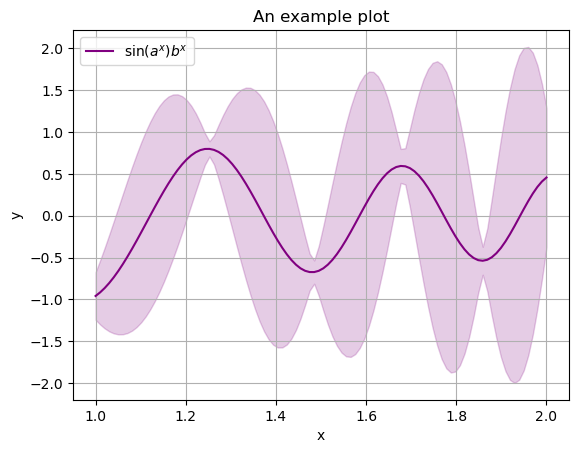

In [13]:
x_data = np.linspace(1,2, 100)
a_val = pt.Err(5,1)
b_val = pt.Err(-1,0.5)
a,b,x = sympy.symbols('a,b,c')
expr = sympy.sin(a*x**2)*x**b
y_data = pt.calc_err(expr, {a: a_val, b:b_val, x:x_data})
pt.start_plt('An example plot', 'x', 'y')
pt.err_band_plot(x_data, y_data.mean, y_data.err, label=r'$\sin(a^x)b^x$', color = 'purple')
pt.end_plt()

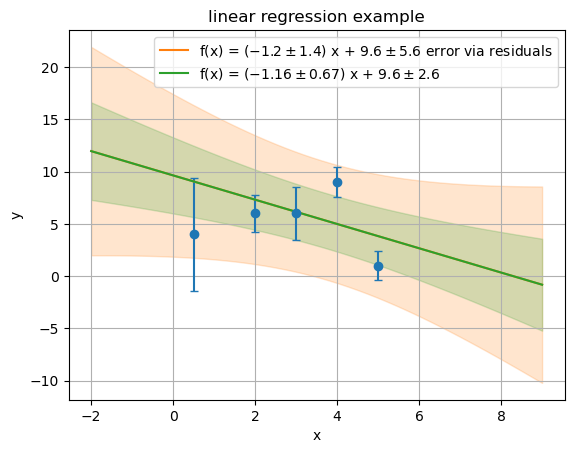

'slope: -1.16 ± 0.67'

'intercept: 9.6 ± 2.6'

In [19]:
x_data = np.array([0.5, 2, 3, 4, 5])
y_data = pt.Err(
    np.array([4, 6, 6, 9, 1]),
    np.array([5.4, 1.8, 2.5, 1.4, 1.4])
    )


pt.start_plt('linear regression example', 'x', 'y')

plt.errorbar(x_data, y_data.mean, y_data.err, capsize=3, fmt='o')


for compute_err_via_residuals in [True, False]:
    slope, intercept, x_center, y_center = pt.linear_linregress(x_data, y_data, compute_err_via_residuals)
    x_data_linregress = np.linspace(-2,9)

    #the shift by x_center is necessary to ensure proper error calculation
    y_data_linregress = slope*(x_data_linregress-x_center)+x_center*slope.mean + intercept 

    pt.err_band_plot(x_data_linregress, y_data_linregress.mean, y_data_linregress.err, f'f(x) = ({slope.latex_array()}) x + {intercept.latex_array()}' + (' error via residuals' if compute_err_via_residuals else ''))

pt.end_plt()
display(f'slope: {slope}', f'intercept: {intercept}')